## INTRODUCTION

Previous week we did a lot of tests. But they always talked about estimating a statistic. We always knew which distribution the statistic will have. 

What if now we want to know the distribution of the sample? It is not important for the CLT but it is something maybe important for us. 

For example, we have the next problem:

The manager of an industrial plant intends to determine if the number of employees that attend the medical office of the plant are distributed equally during the 5 days of work of the week.

Based on a random sample of 4 complete weeks of work, the following number of consultations was observed:

+ Monday: 49
+ Tuesday: 35
+ Wednesday: 32
+ Thursday: 39
+ Friday: 45

With alfa = 0.05, is there any reason to believe that the number of employees attending the doctor's office is not evenly distributed during the days of the week?

What we want to see here is that the probability is a Uniform. And for a week, each day will have a probability 0.2

So our null hypothesis would be: X~U(0.2)

Please note that here the thing is we could always do a finite sample, we will always have a finite number of random variables so we don’t know if the distribution of the population is actually the uniform. 

+ n = 200 = 49+35+32+39+45
+ pi = 0.2
+ n*pi = 40
+ K = 5 days

![](https://www.thoughtco.com/thmb/ns7d4DC1AqVGme2p1-WYqC26r_s=/768x0/filters:no_upscale():max_bytes(150000):strip_icc()/latex_ac74fec08532861eb5f8b87226ebf396-5c59a6fcc9e77c00016b4195.jpg)

## PRACTICE


In [1]:
import numpy as np
from scipy.stats import chisquare

observed = [49,35,32,39,45]
alpha = 0.05



### Now we will need the list of expected values as per the null hypothesis

In [11]:

n = np.sum(observed)
expected =  []
for i in observed:
    a = n/len(observed)
    expected.append(a) 
expected    

[40.0, 40.0, 40.0, 40.0, 40.0]

In [8]:
diff = np.subtract(observed, expected)
chi_squared = np.sum(np.divide(np.square(diff), expected))
chi_squared

4.9

In [9]:
from scipy.stats import chi, chi2

df = len(observed)-1
dist = chi2(df)
dist.ppf(1-alpha)

9.487729036781154

In [10]:
?chi2.ppf


Signature: chi2.ppf(q, *args, **kwds)
Docstring:
Percent point function (inverse of `cdf`) at q of the given RV.

Parameters
----------
q : array_like
    lower tail probability
arg1, arg2, arg3,... : array_like
    The shape parameter(s) for the distribution (see docstring of the
    instance object for more information)
loc : array_like, optional
    location parameter (default=0)
scale : array_like, optional
    scale parameter (default=1)

Returns
-------
x : array_like
    quantile corresponding to the lower tail probability q.
File:      /opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py
Type:      method


### Given that our chi squared is lower than the critical value, we cannot reject the null hypothesis hence cannot reject the fact that the distribution is even with 95% of confidence

In [18]:
observed = [49,35,32,39,100] #play around with the sample
alph = 0.05 #play around with the alpha to change the interval of confidence

n = np.sum(observed)
expected = []
for i in observed:
    a = n/len(observed)
    expected.append(a) 
diff = np.subtract(observed, expected)
chi_squared = np.sum(np.divide(np.square(diff), expected))

print('Here we have the CHI:', chi_squared)

df = len(observed) -1
dist = chi2(df)
criticalvalue = dist.ppf(1-alpha)

print('Critical value is this one here:', criticalvalue)
print('')

if chi_squared > criticalvalue:
    print('YES, we can reject the null hypothesis')
else:
    print(';( we do not really know, we cannot reject the null hypothesis')
    

Here we have the CHI: 62.07843137254902
Critical value is this one here: 9.487729036781154

YES, we can reject the null hypothesis


### What about if we want to test if our distribution is normal?

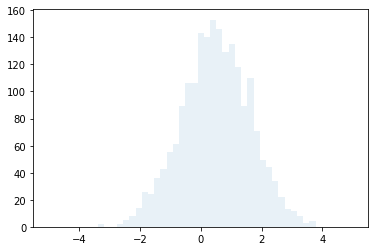


p =  0.3445683746524205

We are not sure, we cannot reject


In [25]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

size =1000
alpha = 0.05

a = np.random.normal(0,1, size = size)
b = np.random.normal(1,1, size = size)

x = np.concatenate((a,b))

bins = np.linspace(-5,5,50)
plt.hist(x, bins,alpha= 0.1)
plt.show()

print('')

k2,p = stats.normaltest(x)

print('p = ',p)
print('')
if p < alpha:
    print('YEAH, we can rejec the null hypothesis. This is not a normal distribution at the given level of confidence')
else:
    print('We are not sure, we cannot reject')